Select 10000 images randomly and work on this sample in the following exercises. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Load the dataset and make your preprocessing like normalizing the data.
2. Apply PCA to the data and get the first two principal components.
3. Using the first two principal components, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.
4. Do you think PCA solution is satisfactory? Can you distinguish between different classes easily?

In [1]:
# laod data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
# from sqlalchemy import create_engine
# import warnings

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [16]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
# indices = np.arange(len(mnist.data))
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


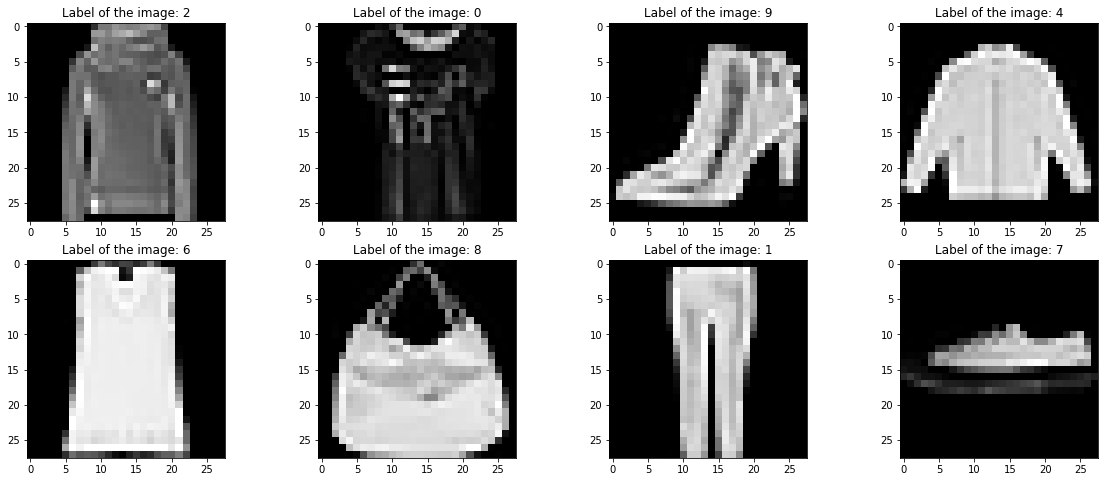

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(241)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(242)
plt.imshow(X[134].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[134]))

plt.subplot(243)
plt.imshow(X[145].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[145]))

plt.subplot(244)
plt.imshow(X[154].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[154]))

plt.subplot(245)
plt.imshow(X[163].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[163]))

plt.subplot(246)
plt.imshow(X[274].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[274]))

plt.subplot(247)
plt.imshow(X[-1].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[-1]))

plt.subplot(248)
plt.imshow(X[194].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[194]))



plt.show()

In [18]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

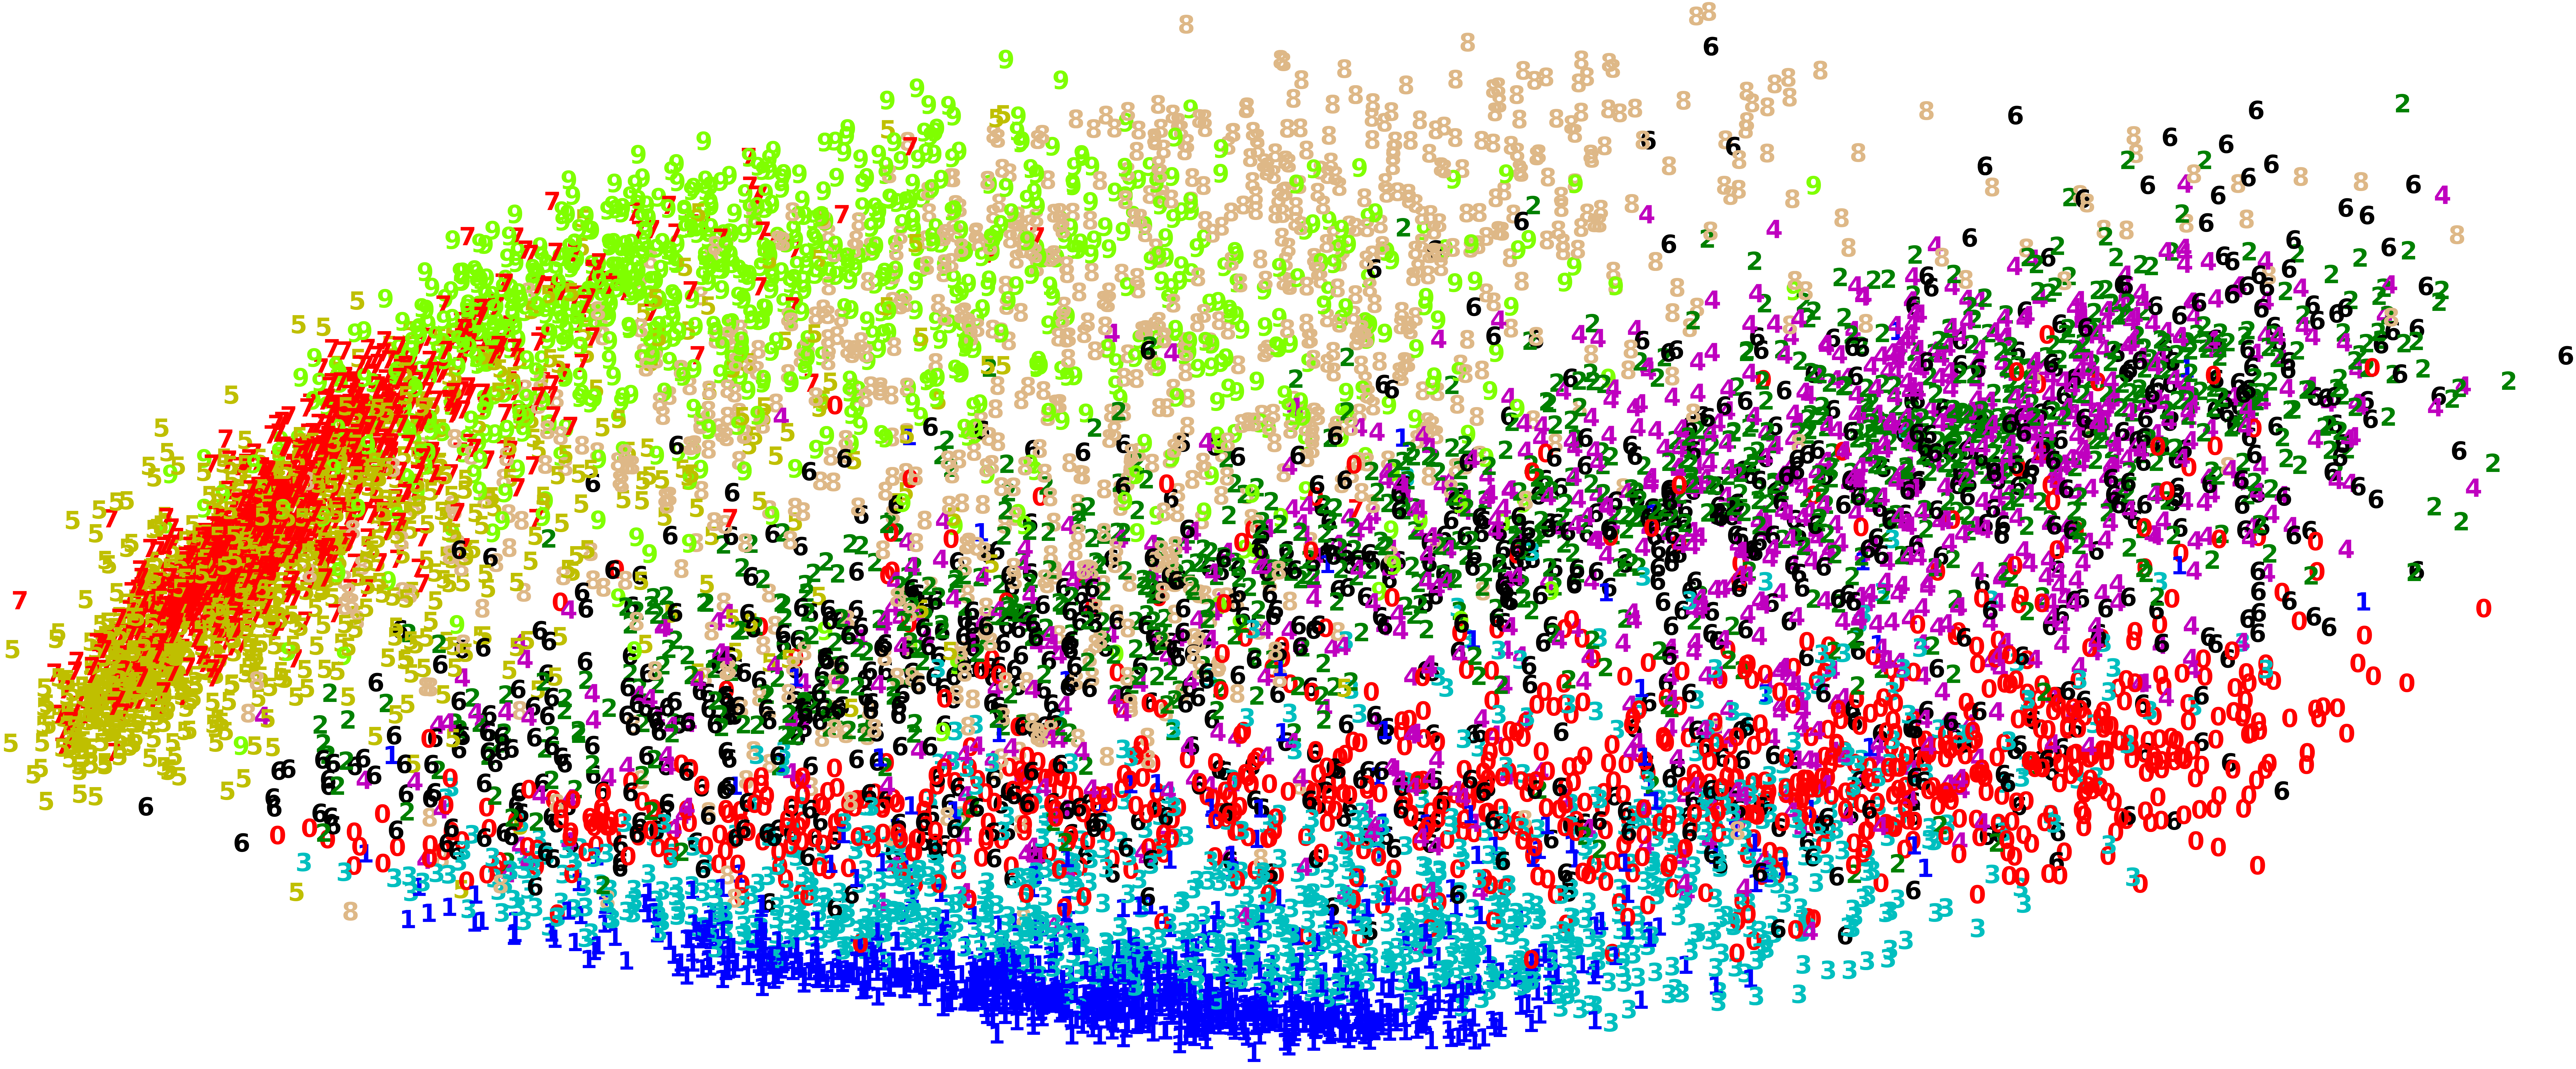

In [28]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 100}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The graph above reveals how the two-dimensional representations of the ten digits spread along the two axis. Most notably, zeros (7s) and ones (1s) occupy the right-most and the left-most regions of the graph respectively. We may argue that shoes(7s) and man pants(1s) are the two most dissimilar characters in terms of their shapes. This makes sense, as we said above, PCA retains the global similarity structure of the data and hence dissimilar objects tend to be located far away from each other in the lower-dimensional representation.

However, local similarities seem not be preserved well in the graph above. For example, almost every digit dispersed along the x-axis and intertwined with other digits. Remember that we colored and tagged each point using the true digit information we have. But in an unsupervised task, we wouldn't have that information. In this case, distinguishing the different digits in the graph above couldn't be made easily. Let's check this:

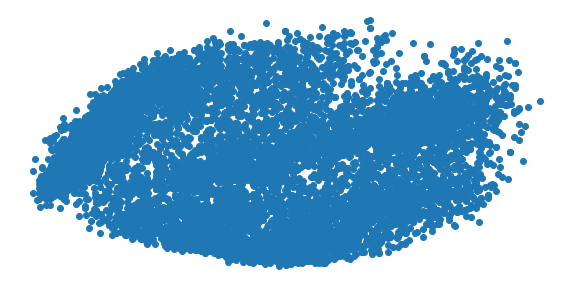

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()